# Shallow Neural Networks

## Load in Python modules

In [4]:
import numpy as np #library for handling arrays with out parallelisation
import scipy as sp #scintific library
%matplotlib inline
import matplotlib #plotting module
import IPython
import pandas as pd
import matplotlib.pyplot as plt
import sklearn #basic machine learning library
import sklearn.datasets

## Data: Two interleaving half circles

Neural networks with hidden layers are non-linear and means that they perform well at differentiating between non-linearly separable datasets. To test their capabilities, here we shall generate a randomly distrubted datasets confined within two half-moon shapes (one half-moon for each class).

In [5]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

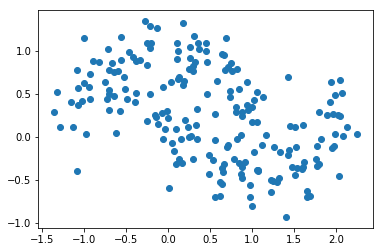

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### 1 Hidden Layer

Implement a 1 hidden layer SNN with tanh activation function and backpropagation algorithm

In [8]:
class SNN1:
    
    def __init__(self,hidden, eta,nepochs,lam):
        self.nepochs = nepochs
        self.eta = eta
        self.lam = lam
        self.num_hidden = hidden
    
    def OneHot(self,y):
        hot_mat = np.zeros((len(y), len(np.unique(y))))
        for i, val in enumerate(y):
            hot_mat[i, val] = 1
        return hot_mat
    
    def softmax(self,z):
        return (np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True))
    
    def activation(self,z):
        return np.tanh(z)
    
    def fit(self,x,y):
        self.num_outcomes = len(np.unique(y))
        self.weights_1 = np.random.random((len(x[0]),self.num_hidden))
        self.weights_2 = np.random.random((self.num_hidden,self.num_outcomes))
        self.bias_1 = np.random.random(self.num_hidden)
        self.bias_2 = np.random.random(self.num_outcomes)
        
        y = self.OneHot(y)
        
        for i in range(self.nepochs):
            
            #perform a forward pass
            z_1 = x.dot(self.weights_1) + self.bias_1
            a_1 = self.activation(z_1)
            z_2 = a_1.dot(self.weights_2) + self.bias_2
            a_2 = self.softmax(z_2)
        
            #perform backpropagation
            error_output = (a_2 - y)*(1-np.power(a_2,2))
            grad_2 = np.dot(a_1.T,error_output)
            error_hidden = np.dot(error_output,self.weights_2.T)*(1-np.power(a_1,2))
            grad_1 = np.dot(x.T,error_hidden)
            
            self.weights_2 -= self.eta*(grad_2 + self.lam*self.weights_2)
            self.weights_1 -= self.eta*(grad_1 + self.lam*self.weights_1)
            self.bias_2 -= self.eta*np.sum(error_output,axis=0)
            self.bias_1 -= self.eta*np.sum(error_hidden,axis=0)
            
        return self
    
    def predict(self,x):
        
        #perform a forward pass
        z_1 = x.dot(self.weights_1) + self.bias_1
        a_1 = self.activation(z_1)
        z_2 = a_1.dot(self.weights_2) + self.bias_2
        softmax = self.softmax(z_2)
        print (softmax)
        return softmax.argmax(axis=1)

## 2 Hidden Layers

Set the initial parameters of the model

In [9]:
SNN = SNN1(3,0.01,20000,0.01)

Fit the model

In [10]:
SNN.fit(X_train,y_train)

<__main__.SNN1 instance at 0x109fe4170>

Test the model

In [11]:
ypred = SNN.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, ypred))

[[9.75315428e-01 2.46845724e-02]
 [9.75593400e-01 2.44066002e-02]
 [9.98417204e-01 1.58279577e-03]
 [9.94119114e-01 5.88088560e-03]
 [9.93964325e-01 6.03567451e-03]
 [8.82025680e-17 1.00000000e+00]
 [8.67150003e-17 1.00000000e+00]
 [1.23436337e-01 8.76563663e-01]
 [8.78454604e-17 1.00000000e+00]
 [9.74202573e-01 2.57974268e-02]
 [9.94118844e-01 5.88115630e-03]
 [9.94118990e-01 5.88101014e-03]
 [1.32753529e-15 1.00000000e+00]
 [1.15741273e-01 8.84258727e-01]
 [8.65820042e-17 1.00000000e+00]
 [1.14816804e-01 8.85183196e-01]
 [1.16127837e-01 8.83872163e-01]
 [9.75388149e-01 2.46118514e-02]
 [3.06738297e-01 6.93261703e-01]
 [1.16016476e-01 8.83983524e-01]
 [8.65688989e-17 1.00000000e+00]
 [9.74700306e-01 2.52996943e-02]
 [9.99950940e-01 4.90600761e-05]
 [9.75593302e-01 2.44066982e-02]
 [1.16098923e-01 8.83901077e-01]
 [9.75916270e-01 2.40837304e-02]
 [9.75431737e-01 2.45682628e-02]
 [9.75600491e-01 2.43995091e-02]
 [1.16291457e-01 8.83708543e-01]
 [2.55723036e-16 1.00000000e+00]
 [9.755933

Plot the model

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier,
                       test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=cmap(idx),
                       marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label='test set')

[[9.94119152e-01 5.88084758e-03]
 [9.94119148e-01 5.88085241e-03]
 [9.94119140e-01 5.88085964e-03]
 ...
 [8.65686721e-17 1.00000000e+00]
 [8.65686721e-17 1.00000000e+00]
 [8.65686721e-17 1.00000000e+00]]


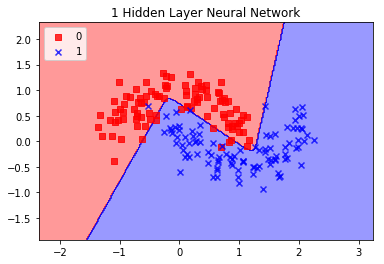

In [13]:
X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
#plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=SNN)
plt.title(r'1 Hidden Layer Neural Network')
plt.legend(loc='upper left')

plt.savefig("SNN1,3.png", dpi = 300)

### Additional information found here:

http://ufldl.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/ (for a mathematica overview)

http://colah.github.io/posts/2015-08-Backprop/ (for backpropagation calculus)

http://cs231n.github.io/optimization-2/ (for more on backpropagation as well as CNNs)

## Test on MNIST dataset

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()

In [11]:
X_MNIST = digits.data
y_MNIST = digits.target

In [12]:
from sklearn.model_selection import train_test_split
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(
    X_MNIST, y_MNIST, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train_M)
X_train_M = sc.transform(X_train_M)
X_test_M = sc.transform(X_test_M)

In [14]:
X_train_M = np.array(X_train_M)
X_test_M = np.array(X_test_M)
y_train_M = np.array(y_train_M)
y_test_M = np.array(y_test_M)

Increasing the number of hidden units in the layer has increased the accuracy from 0.7 to 0.98

In [15]:
SNN = SNN1(100,0.01,20000,0.01)

In [16]:
SNN.fit(X_train_M,y_train_M)

KeyboardInterrupt: 

In [ ]:
ypred = SNN.predict(X_test_M)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test_M, ypred))